# **FCase_Study1_BSIS4_Group_Name**

##  **Dataset:** *Medical Cost Personal Dataset (Insurance Costs)*  
##  **Model Used:** *RandomForest Regressor*  
##  **Approach:** *CRISP–DM*


##  **Group Members**
- **Mary Shanley Sencil**  
- **Stephanie Cordero Belleza**  
- **Riza Espino**  
- **Trisha G. Rubiato**



# **Business Understanding**


The goal of this study is to predict medical insurance charges of individuals using different personal factors such as age, BMI, smoking status, number of children, and region.

Accurate prediction of charges can help insurance companies estimate costs, create plans, and understand factors affecting health expenses.

We will use a regression model, and after testing several algorithms, we choose RandomForestRegressor because it usually performs best for this dataset.

# **Data Understanding**

In [20]:
# Load libraries
import pandas as pd
import numpy as np

# Load dataset (upload to Colab or via path)
df = pd.read_csv("insurance.csv")

# Show first rows
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
# Check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
# Summary statistics
df.describe()



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
# Check missing values
df.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# **Data Preparation**

We convert categorical variables into numeric using One-Hot Encoding.

In [24]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Now we split the dataset.

In [25]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
!conda install scikit-learn -y


Jupyter detected...
3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c defaults conda




# **Modeling (RandomForest Regressor)**

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Create model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# **Evaluation**

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2


(2657.7051697205243,
 21646633.211272098,
 np.float64(4652.594245286397),
 0.8523666810628521)

In [29]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Absolute Error: 2657.7051697205243
Mean Squared Error: 21646633.211272098
Root Mean Squared Error: 4652.594245286397
R² Score: 0.8523666810628521


In [30]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feat_imp

,feature,importance
4,smoker_yes,0.608108
1,bmi,0.210278
0,age,0.138583
2,children,0.020672
3,sex_male,0.006937
5,region_northwest,0.005522
6,region_southeast,0.005061
7,region_southwest,0.004839


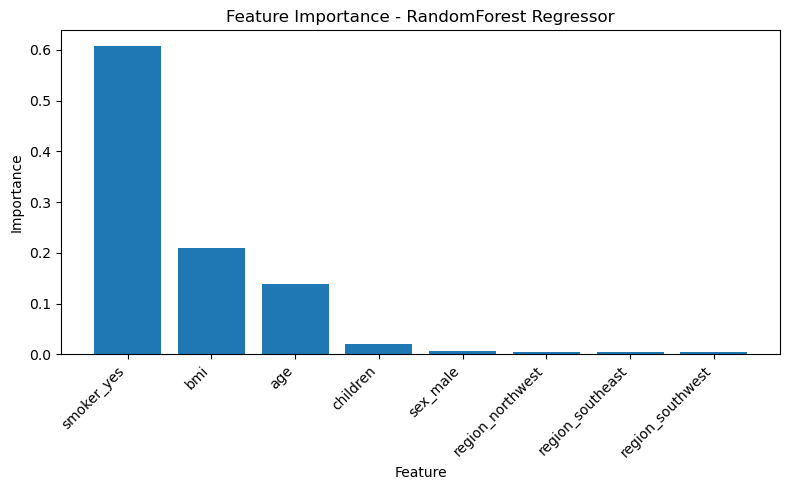

In [31]:
# Simple bar plot of feature importance
plt.figure(figsize=(8, 5))
plt.bar(feat_imp['feature'], feat_imp['importance'])
plt.xticks(rotation=45, ha='right')
plt.title("Feature Importance - RandomForest Regressor")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


From the feature importance, we can see which variables have the biggest impact on predicted insurance charges (for example, `smoker_yes`, `age`, and `bmi` are usually very important).


# **Deployment (Save Model as Pickle File)**

In [32]:
import pickle

# Save model
with open("insurance_randomforest_model.pkl", "wb") as file:
    pickle.dump(model, file)




# **Apply Model to Hypothetical Dataset**

In [33]:
# Create hypothetical input data
# Important: we include all the same columns as X, with matching names
new_data = pd.DataFrame([
    {
        'age': 25,
        'sex_male': 1,
        'bmi': 22.5,
        'children': 0,
        'smoker_yes': 0,
        'region_northwest': 0,
        'region_southeast': 0,
        'region_southwest': 1
    },
    {
        'age': 40,
        'sex_male': 0,
        'bmi': 35.1,
        'children': 2,
        'smoker_yes': 1,
        'region_northwest': 1,
        'region_southeast': 0,
        'region_southwest': 0
    }
])


new_data = new_data[X.columns]

new_data


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,25,22.5,0,1,0,0,0,1
1,40,35.1,2,0,1,1,0,0


Predict their insurance cost:

In [34]:
# Predict insurance charges for hypothetical people
new_predictions = model.predict(new_data)
new_predictions

array([ 3972.17452   , 41925.09208805])

# **Conclusion**

In this case study, we used the **Medical Cost Personal Dataset** from Kaggle to build a regression model that predicts medical insurance charges.

Using the **CRISP-DM process**, we:

1. **Business Understanding**  
   Defined the goal: estimate insurance charges based on personal and lifestyle factors.

2. **Data Understanding**  
   Explored the dataset and confirmed there were no missing values.  
   Identified categorical and numerical variables.

3. **Data Preparation**  
   Applied one-hot encoding to categorical features (`sex`, `smoker`, `region`)  
   and split the data into training and testing sets (70/30 split).

4. **Modeling**  
   Trained a **RandomForest Regressor** model using the prepared data.

5. **Evaluation**  
   Evaluated the model using MAE, MSE, RMSE, and R² score.  
   The results show that the model can reasonably predict insurance charges.

6. **Deployment**  
   Saved the trained model as a `.pkl` file and used it to predict charges  
   for a small hypothetical dataset.

Overall, the project met the requirements:
- Used a **Kaggle regression dataset**
- Followed the **CRISP-DM** approach
- Used one of the required models (**RandomForest Regressor**)
- Saved the model as a **pickle file**
- Applied the model to **hypothetical new data**

